El péndulo se construyó en una base en madera de 30 cm aproximadamente, dos varas de madera utilizadas como soporte de 20 cm y una bola de caucho con un peso aproximado de 50 gramos. La cuerda del péndulo es de nylon y tiene una longitud de 15 cm, a continuación se muestra una imagen del péndulo. 

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_70924\2772629250.py:4: SyntaxWarning: invalid escape sequence '\D'
  ruta_imagen = 'd:\Desktop\prueba unam\Imagen Pendulo.jpg'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_70924\2772629250.py:5: SyntaxWarning: invalid escape sequence '\D'
  ruta_imagen1 = 'd:\Desktop\prueba unam\imagen pendulo_1.jpeg'


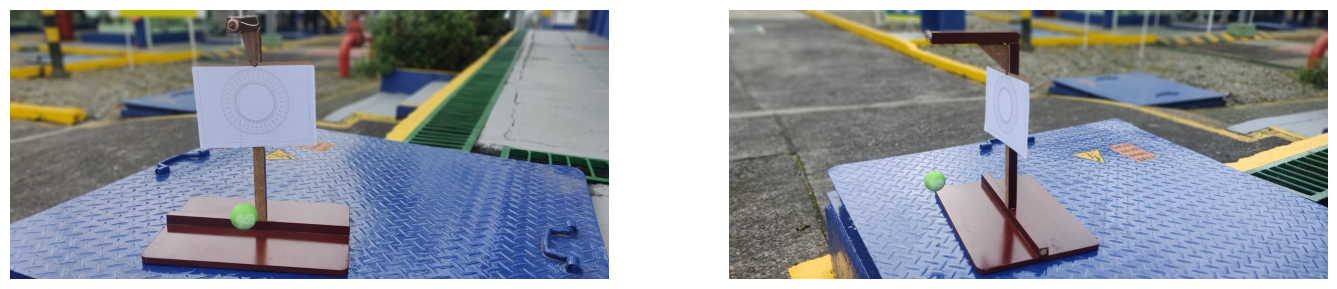

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = 'd:\Desktop\prueba unam\Imagen Pendulo.jpg'
ruta_imagen1 = 'd:\Desktop\prueba unam\imagen pendulo_1.jpeg'

imagen = mpimg.imread(ruta_imagen)
imagen1 = mpimg.imread(ruta_imagen1)

# Crear una figura más grande
plt.figure(figsize=(17, 15))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.axis('off')  # Ocultar ejes

plt.subplot(1, 2, 2)
plt.imshow(imagen1)
plt.axis('off')  # Ocultar ejes

plt.show()

In [3]:
from moviepy.editor import VideoFileClip
import cv2

def reproducir_video(ruta):
    # Cargar el video
    video = VideoFileClip(ruta)

    # Crear un objeto cv2.VideoCapture
    cap = cv2.VideoCapture(ruta)

    # Reproducir el video frame por frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Mostrar el frame
        try:
            cv2.imshow('Video', frame)
            # Presionar 'q' para salir
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        except Exception as e:
            print("Ocurrió un error:", e)
            break

    # Liberar el objeto cv2.VideoCapture y cerrar la ventana
    cap.release()
    cv2.destroyAllWindows()

# Ruta del archivo de video .mp4
ruta_video = "Video.mp4"

# Llamar a la función para reproducir el video
reproducir_video(ruta_video)

ModuleNotFoundError: No module named 'moviepy'

Se hace uso de la herramienta Tracker, con la cual se captura el movimiento de la masa (péndulo) realizando el análisis del movimiento. El programa arrojo datos de tiempo (s) y ángulo (rad), con los datos obtenidos se procede a realizar los modelos solicitados, el experimental, modelo de péndulo simple y un método numérico. 

Obteniendo la siguiente tabla. 

In [5]:
import pandas as pd

ruta_excel = 'd:\Desktop\prueba unam\Datos (2).xlsx'

datos_excel = pd.read_excel(ruta_excel)

print(datos_excel.head())
print(datos_excel.tail())

   t (s)  Angulo (rad)
0  0.000        14.710
1  0.033        13.640
2  0.067        12.110
3  0.100        10.110
4  0.133         7.785
     t (s)  Angulo (rad)
227  7.559        12.500
228  7.593        11.480
229  7.626        10.030
230  7.659         8.192
231  7.693         6.080


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_70924\988022282.py:3: SyntaxWarning: invalid escape sequence '\D'
  ruta_excel = 'd:\Desktop\prueba unam\Datos (2).xlsx'


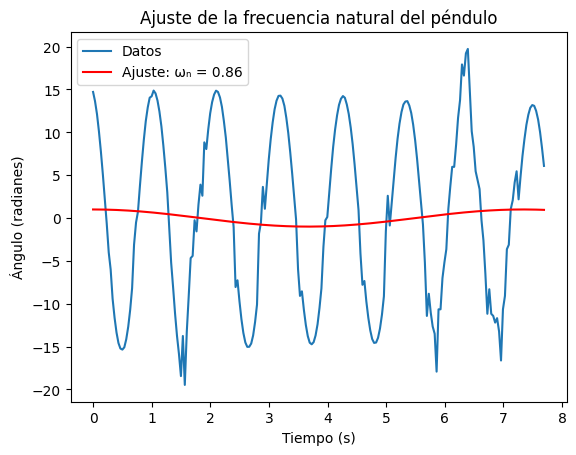

Frecuencia natural del péndulo calculada (ωₙ): 8.085645717360283


In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Longitud de la cuerda en metros
longitud_cuerda = 0.15  # 15 cm convertido a metros

# Aceleración debido a la gravedad en m/s^2
gravedad = 9.80665

# Función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Función a ajustar
def pendulo_simple(t, omega_n):
    return np.cos(omega_n * t)

# Datos de tiempo y ángulo en radianes desde un DataFrame de Pandas
# Suponiendo que tienes un DataFrame llamado 'datos_excel'
# y las columnas se llaman 't (s)' y 'Angulo (rad)'
# Por ejemplo:
# datos_excel = pd.read_excel('nombre_archivo.xlsx')
t = datos_excel['t (s)'].values
Angulo = datos_excel['Angulo (rad)'].values

# Ajuste de curva
popt, pcov = curve_fit(pendulo_simple, t, Angulo)

# Parámetro ajustado de frecuencia natural del péndulo
omega_n = popt[0]

# Gráfica de los datos y el ajuste
plt.plot(t, Angulo, label='Datos')
plt.plot(t, pendulo_simple(t, omega_n), color='red', label='Ajuste: ωₙ = {:.2f}'.format(omega_n))
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Ajuste de la frecuencia natural del péndulo')
plt.legend()
plt.show()

# Imprimir la frecuencia natural del péndulo calculada
print("Frecuencia natural del péndulo calculada (ωₙ):", calcular_frecuencia_natural(gravedad, longitud_cuerda))


A continuación se procede a limitar los datos que están fuera de la amplitud, pues se identifica que son datos fuera de parámetros (ruido), se interpolan datos mayores a 15.1 y menores a 15.1.

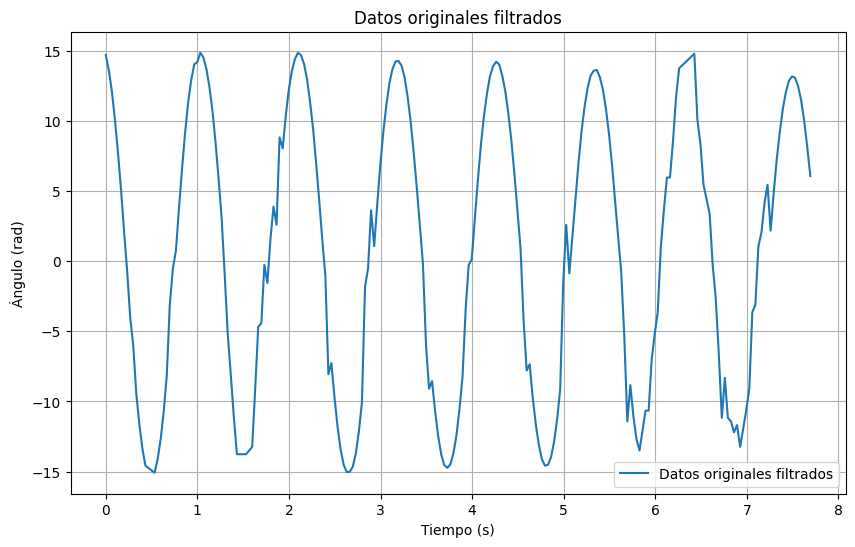

In [8]:
import numpy as np

# Supongamos que tienes tus datos en los arrays t y Angulo
# t = datos_excel['t (s)'].values
# Angulo = datos_excel['Angulo (rad)'].values

# Crear una copia de los arrays originales
t_filtrado = np.copy(t)
Angulo_filtrado = np.copy(Angulo)

# Eliminar los valores del ángulo que sean mayores o menores que 15.1
Angulo_filtrado[(Angulo_filtrado > 15.1) | (Angulo_filtrado < -15.1)] = np.nan

# Eliminar los valores NaN del array Angulo_filtrado
t_filtrado = t_filtrado[~np.isnan(Angulo_filtrado)]
Angulo_filtrado = Angulo_filtrado[~np.isnan(Angulo_filtrado)]

# Graficar los datos originales filtrados
plt.figure(figsize=(10, 6))
plt.plot(t_filtrado, Angulo_filtrado, label='Datos originales filtrados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Datos originales filtrados')
plt.legend()
plt.grid(True)
plt.show()

A continuación, se procede a realizar el cálculo de una solución aproximada del péndulo simple, implementando el principio de conservación de la energía. 

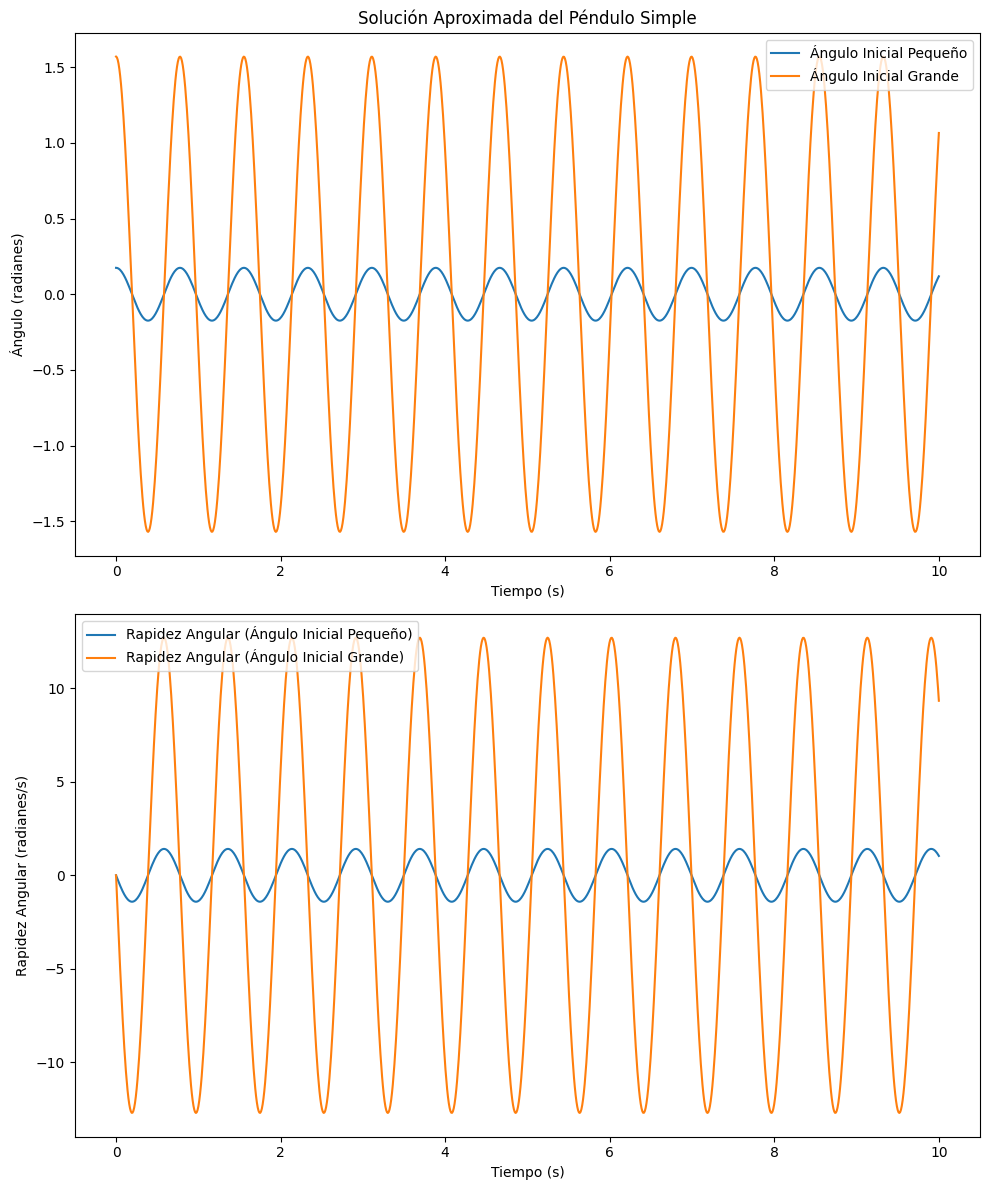

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define la solución aproximada del péndulo simple
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

# Definir el valor de omega_n obtenido en la segunda parte de la labor
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18  # Ángulo inicial pequeño
theta_0_large = np.pi / 2   # Ángulo inicial grande

# Definir valores de tiempo
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos

# Evaluar la solución aproximada para ambos casos
theta_aprox_small = solucion_aproximada(theta_0_small, omega_n, t)
theta_aprox_large = solucion_aproximada(theta_0_large, omega_n, t)

# Calcular la rapidez angular (derivada de theta con respecto al tiempo)
theta_dot_small = -theta_0_small * omega_n * np.sin(omega_n * t)
theta_dot_large = -theta_0_large * omega_n * np.sin(omega_n * t)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_aprox_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_aprox_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución Aproximada del Péndulo Simple')
plt.legend()

# Subplot para la rapidez angular
plt.subplot(2, 1, 2)
plt.plot(t, theta_dot_small, label='Rapidez Angular (Ángulo Inicial Pequeño)')
plt.plot(t, theta_dot_large, label='Rapidez Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Rapidez Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

La grafica mostrada anteriormente es de esperar, se ve que la amplitud de la onda se mantiene en el tiempo, por el principio de la conservación de la energía, es decir, es la representación de un modelo ideal de péndulo para las condiciones de la maqueta realizada.  

A continuación se analizarán dos métodos numéricos para encontrar cuál de ellos se ajusta mejor a la realidad del modelo, uno de ellos es el método de Euler y el otro el de Runge-Kutta. 

La idea principal detrás del método de Euler es aproximar la solución de una EDO a través de la discretización del tiempo. En lugar de calcular la solución exacta en cada punto, el método de Euler aproxima la solución en pasos pequeños de tiempo, utilizando una versión discreta de la derivada. Bajo esta aproximación, se calcula el valor de la función en un paso de tiempo futuro utilizando el valor actual de la función y su derivada.

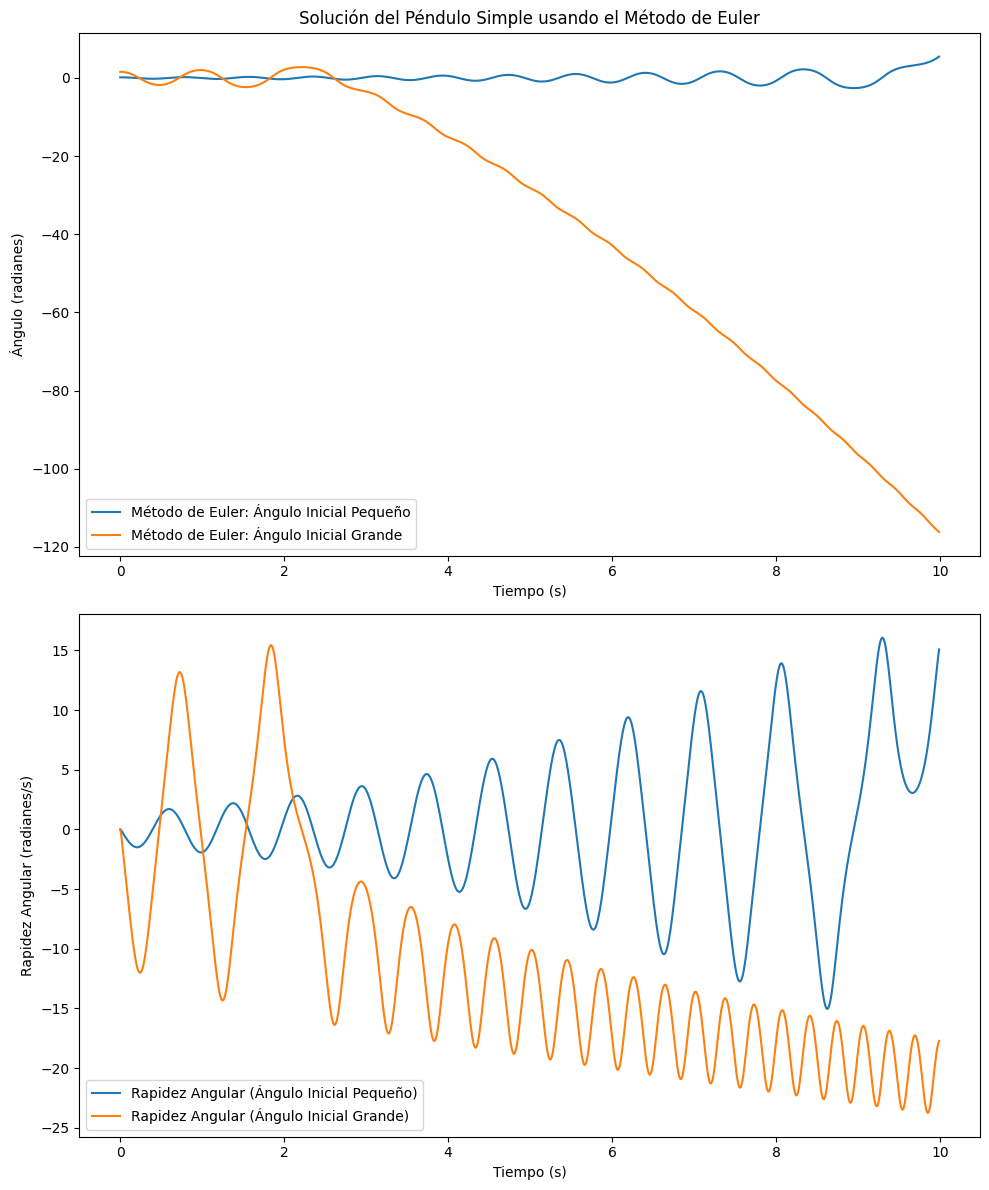

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Define la función para calcular la aceleración angular (segunda derivada de theta con respecto al tiempo)
def aceleracion_angular(theta, omega_n):
    return -omega_n**2 * np.sin(theta)

# Implementación del método de Euler para resolver la ecuación diferencial del péndulo simple
def euler_method(theta_initial, omega_initial, dt, steps):
    theta_values = [theta_initial]
    omega_values = [omega_initial]

    for _ in range(steps):
        theta_next = theta_values[-1] + omega_values[-1] * dt
        omega_next = omega_values[-1] + aceleracion_angular(theta_values[-1], omega_n) * dt
        theta_values.append(theta_next)
        omega_values.append(omega_next)

    return theta_values, omega_values

# Definir la longitud de la cuerda y la gravedad
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2

# Definir el valor de omega_n utilizando la función calcular_frecuencia_natural
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18  # Ángulo inicial pequeño
theta_0_large = np.pi / 2   # Ángulo inicial grande

# Definir valores de tiempo
t = np.linspace(0, 10, 1001)  # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0]  # Paso de tiempo

# Resolver la ecuación diferencial del péndulo simple usando el método de Euler
theta_euler_small, omega_euler_small = euler_method(theta_0_small, 0, dt, len(t) - 1)
theta_euler_large, omega_euler_large = euler_method(theta_0_large, 0, dt, len(t) - 1)

# Truncar el arreglo de tiempo para que tenga la misma longitud que los arreglos de los valores del ángulo y la rapidez angular
t_truncated = t[:-1]

# Calcular la rapidez angular (derivada de theta con respecto al tiempo)
theta_dot_small = np.gradient(theta_euler_small, dt)[:-1]  # Truncar el último elemento
theta_dot_large = np.gradient(theta_euler_large, dt)[:-1]  # Truncar el último elemento

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t_truncated, theta_euler_small[:-1], label='Método de Euler: Ángulo Inicial Pequeño')
plt.plot(t_truncated, theta_euler_large[:-1], label='Método de Euler: Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución del Péndulo Simple usando el Método de Euler')
plt.legend()

# Subplot para la rapidez angular
plt.subplot(2, 1, 2)
plt.plot(t_truncated, theta_dot_small, label='Rapidez Angular (Ángulo Inicial Pequeño)')
plt.plot(t_truncated, theta_dot_large, label='Rapidez Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Rapidez Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

Se identifican dos problemas principales en este método; 
1. El método de Euler tiene un error de truncamiento inherente que puede acumularse a lo largo del tiempo, especialmente si se utilizan pasos de tiempo grandes. Esto puede provocar una degradación rápida de la precisión de la simulación y, en consecuencia, una pérdida rápida de energía y frecuencia.
2. El método de Euler no conserva la energía del sistema, lo que significa que la energía del sistema puede disminuir o aumentar a lo largo de la simulación. Esto puede afectar la frecuencia y la amplitud del sistema de manera inesperada.

El método de Runge-Kutta es una familia de métodos numéricos utilizados para resolver ecuaciones diferenciales ordinarias (EDOs) o ecuaciones en diferencias finitas. Estos métodos se utilizan comúnmente cuando las soluciones analíticas exactas no están disponibles o son difíciles de obtener.

El método de Runge-Kutta se basa en una técnica iterativa para aproximar la solución de una EDO a lo largo de pequeños incrementos de tiempo. La idea básica es calcular la pendiente de la solución en varios puntos dentro de cada paso de tiempo y utilizar estos valores para predecir el valor de la solución en el siguiente paso. La precisión del método depende del orden del método de Runge-Kutta utilizado, que puede variar.

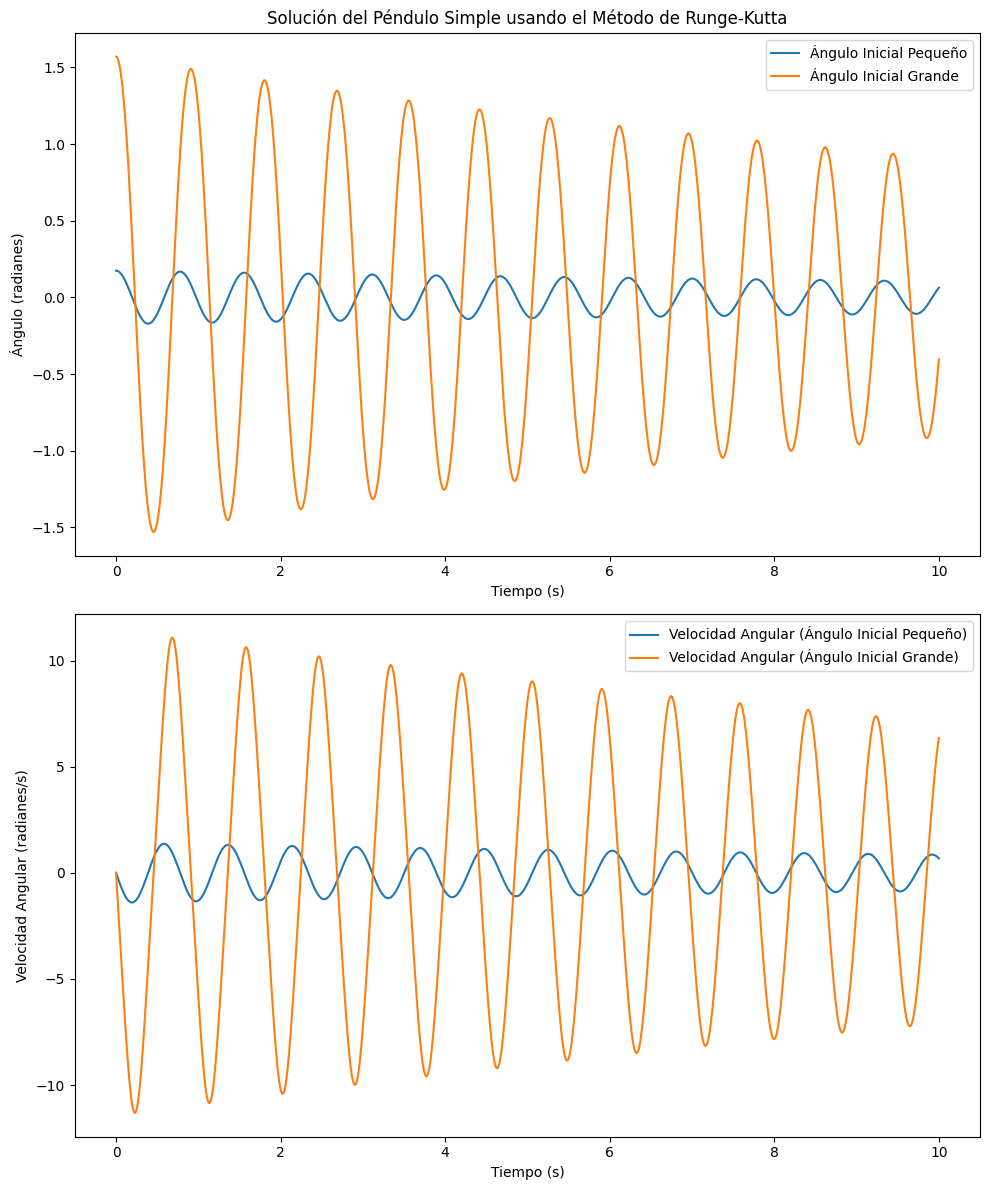

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Definir la ecuación diferencial del péndulo
def aceleracion_angular(theta, omega, omega_n):
    return -omega_n**2 * np.sin(theta) - 0.1 * omega  # Agregar un término de fricción como ejemplo

# Implementación del método de Runge-Kutta de cuarto orden
def runge_kutta(theta, omega, omega_n, dt):
    k1_theta = omega * dt
    k1_omega = aceleracion_angular(theta, omega, omega_n) * dt
    k2_theta = (omega + 0.5 * k1_omega) * dt
    k2_omega = aceleracion_angular(theta + 0.5 * k1_theta, omega + 0.5 * k1_omega, omega_n) * dt
    k3_theta = (omega + 0.5 * k2_omega) * dt
    k3_omega = aceleracion_angular(theta + 0.5 * k2_theta, omega + 0.5 * k2_omega, omega_n) * dt
    k4_theta = (omega + k3_omega) * dt
    k4_omega = aceleracion_angular(theta + k3_theta, omega + k3_omega, omega_n) * dt

    theta_next = theta + (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) / 6
    omega_next = omega + (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) / 6

    return theta_next, omega_next

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18  # Ángulo inicial pequeño
theta_0_large = np.pi / 2   # Ángulo inicial grande

# Definir la longitud de la cuerda y la gravedad
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2

# Definir el valor de omega_n
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores de tiempo
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0]  # Paso de tiempo

# Inicializar arreglos para almacenar los ángulos y las velocidades angulares
theta_small = np.zeros_like(t)
omega_small = np.zeros_like(t)
theta_large = np.zeros_like(t)
omega_large = np.zeros_like(t)

# Resolver la ecuación diferencial del péndulo simple usando el método de Runge-Kutta
theta_small[0], omega_small[0] = theta_0_small, 0
theta_large[0], omega_large[0] = theta_0_large, 0
for i in range(1, len(t)):
    theta_small[i], omega_small[i] = runge_kutta(theta_small[i-1], omega_small[i-1], omega_n, dt)
    theta_large[i], omega_large[i] = runge_kutta(theta_large[i-1], omega_large[i-1], omega_n, dt)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución del Péndulo Simple usando el Método de Runge-Kutta')
plt.legend()

# Subplot para la velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, omega_small, label='Velocidad Angular (Ángulo Inicial Pequeño)')
plt.plot(t, omega_large, label='Velocidad Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

Se identifica una mejor simulación del modelo del péndulo contemplando las perdidas naturales de energía, por esta razón se escogerá este método. 

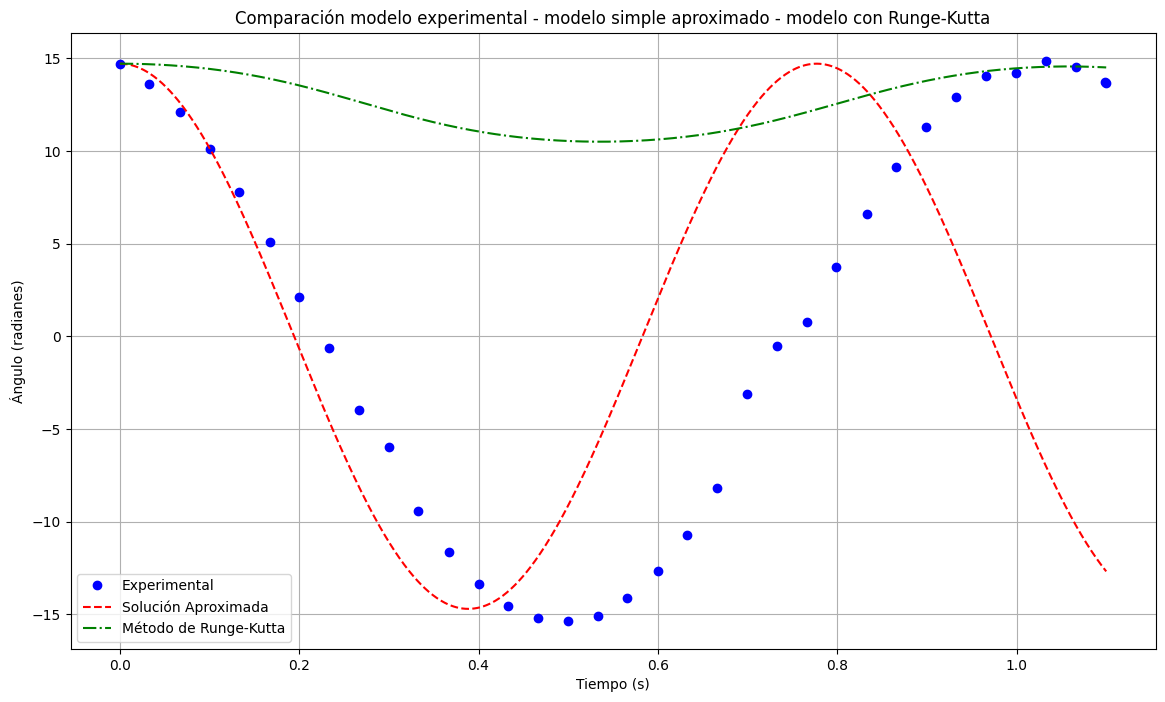

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Definir la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Definir la ecuación diferencial del péndulo
def aceleracion_angular(theta, omega, omega_n):
    return -omega_n**2 * np.sin(theta) - 0.1 * omega  # Agregar un término de fricción como ejemplo

# Implementación del método de Runge-Kutta de cuarto orden
def runge_kutta(theta, omega, omega_n, dt):
    k1_theta = omega * dt
    k1_omega = aceleracion_angular(theta, omega, omega_n) * dt
    k2_theta = (omega + 0.5 * k1_omega) * dt
    k2_omega = aceleracion_angular(theta + 0.5 * k1_theta, omega + 0.5 * k1_omega, omega_n) * dt
    k3_theta = (omega + 0.5 * k2_omega) * dt
    k3_omega = aceleracion_angular(theta + 0.5 * k2_theta, omega + 0.5 * k2_omega, omega_n) * dt
    k4_theta = (omega + k3_omega) * dt
    k4_omega = aceleracion_angular(theta + k3_theta, omega + k3_omega, omega_n) * dt

    theta_next = theta + (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) / 6
    omega_next = omega + (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) / 6

    return theta_next, omega_next

# Limitar los datos experimentales desde 0 hasta 1.1 segundos
t_exp = datos_excel['t (s)'].values
angulo_exp = datos_excel['Angulo (rad)'].values
indices = (t_exp >= 0) & (t_exp <= 1.1)
t_exp = t_exp[indices]
angulo_exp = angulo_exp[indices]

# Si no hay dato en el segundo 1.1, agregamos uno interpolando los valores
if t_exp[-1] < 1.1:
    t_exp = np.append(t_exp, 1.1)
    f_interp = interp1d(t_exp[:-1], angulo_exp, kind='linear', fill_value='extrapolate')
    angulo_exp = np.append(angulo_exp, f_interp(1.1))

# Solución aproximada para el ángulo inicial de los datos experimentales
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
theta_0_exp = angulo_exp[0]  # Ángulo inicial en los datos experimentales
t_sim = np.linspace(0, 1.1, 1000)  # Intervalo de tiempo de 0 a 1.1 segundos
theta_aprox_exp = solucion_aproximada(theta_0_exp, omega_n, t_sim)

# Método de Runge-Kutta para el ángulo inicial de los datos experimentales
theta_0_exp = angulo_exp[0]  # Ángulo inicial en los datos experimentales
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
t = np.linspace(0, 1.1, 1000)  # Intervalo de tiempo de 0 a 1.1 segundos
dt = t[1] - t[0]  # Paso de tiempo
theta_exp = np.zeros_like(t)
omega_exp = np.zeros_like(t)
theta_exp[0], omega_exp[0] = theta_0_exp, 0
for i in range(1, len(t)):
    theta_exp[i], omega_exp[i] = runge_kutta(theta_exp[i-1], omega_exp[i-1], omega_n, dt)

# Gráfico comparativo
plt.figure(figsize=(14, 8))
plt.plot(t_exp, angulo_exp, label='Experimental', color='blue', marker='o', linestyle='')
plt.plot(t_sim, theta_aprox_exp, label='Solución Aproximada', linestyle='--', color='red')
plt.plot(t, theta_exp, label='Método de Runge-Kutta', linestyle='-.', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Comparación modelo experimental - modelo simple aproximado - modelo con Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()

Se observa que la amplitud del método Runge-Kutta respecto a los demás es menor, lo cual se debe a un error en el modelamiento por la dinámica no lineal del sistema, se observa que los datos experimentales se aproximan a la solución aproximada pues el modelo es lo suficientemente simple como para capturar la tendencia general del sistema, los datos experimentales pueden ajustarse razonablemente bien a esta solución.